<a href="https://colab.research.google.com/github/taravatp/Facial_Keypoint_Detection/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import transforms
import numpy as np
import cv2
import glob
from copy import deepcopy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [3]:
class facial_keypoint(Dataset):
  def __init__(self,samples, data_directory):
    super(facial_keypoint).__init__()
    self.samples = samples
    self.data_directory = data_directory
    self.normalize = transforms.Normalize(mean=[0.485,0.456,0.406], std=[0.229,0.224,0.225])

  def __len__(self):
    return len(self.samples)
  
  def __getitem__(self,idx):
    image_path = self.data_directory + self.samples.iloc[idx,0]

    #image preprocessing
    image = cv2.imread(image_path)
    orig_height, orig_width , channels = image.shape
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,(224,224))
    image = image/255
    image = np.transpose(image,(2,0,1))
    image = torch.tensor(image)
    image = self.normalize(image)


    #preparing keypoints
    keypoints = deepcopy(self.samples.iloc[idx,1:].tolist())
    x_coords = np.array(keypoints[0::2]) 
    x_coords = (x_coords / orig_width).tolist()
    y_coords = np.array(keypoints[1::2])
    y_coords = (y_coords  / orig_height).tolist()

    #x and y coordinates will have values between 0 and 1
    keypoints = x_coords + y_coords
    keypoints = torch.tensor(keypoints)

    return image.float().to(device),keypoints.to(device)


# dataset Experiment

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


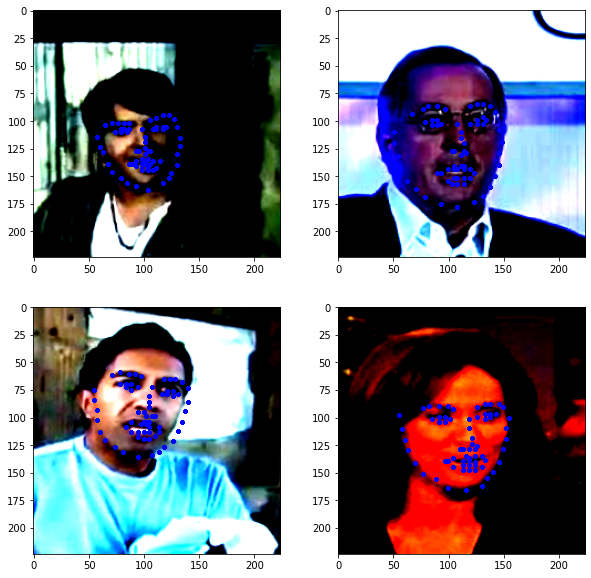

In [10]:
if __name__ == "__main__":
  samples_directory = "/content/drive/MyDrive/facial_keypoint_detection/P1_Facial_Keypoints/data/training_frames_keypoints.csv" #use ur own directory
  samples = pd.read_csv(samples_directory)
  data_directory = '/content/drive/MyDrive/facial_keypoint_detection/P1_Facial_Keypoints/data/training/'#use ur own directory
  test = facial_keypoint(samples,data_directory)
  def dataset_experiment(test):
    plt.figure(figsize=(10,10))
    for i in range(4):
      image,keypoints = test[i*10] #fetching sample numbers 0,10,20,30
      image = np.array(image,dtype = 'float32')
      image = np.transpose(image,(1,2,0))
      image = cv2.resize(image,(224,224))
      plt.subplot(2,2,i+1)
      plt.imshow(image)
      for j in range(len(keypoints)):
        xpoints = keypoints[0:int(len(keypoints)/2)] * image.shape[0]
        ypoints = keypoints[int(len(keypoints)/2):] * image.shape[1]
        plt.plot(xpoints,ypoints,'b.')
  dataset_experiment(test)